In [16]:
import numpy as np
import pandas as pd
import numpy.linalg as alg
import scipy as sp
import matplotlib.pyplot as plt
data = pd.read_csv('D:/课程/CSIC5011/hw1/data2.csv')
print(data)
Data = np.array(data)
n = len(Data)
cities = np.array(data.columns)

In [19]:
def mds(D, dim=[]):
    H = -np.ones((n, n))/n
    H = -H.dot(D ** 2).dot(H)/2
    evals, evecs = alg.eigh(H)

    # Sort by eigenvalu in descending order
    idx = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:, idx]

    #Compute the coordinates using positive eigenvalued components only
    w, = np.where(evals > 0)
    if dim!=[]:
        arr = evals
        w = arr.argsort()[-dim:][::-1]
    if np.any(evals[w]<0):
        print('Error: Not enough positive eigenvalues for the selected dim.')
        return []
    L = np.diag(np.sqrt(evals[w]))
    V = evecs[:, w]
    Y = V.dot(L)
    return Y, evals, evecs

In [21]:
X2, eigen_values, eigen_vectors = mds(Data, dim=2)
total = np.sum(eigen_values)
normed_eigen_values = eigen_values/total
print("Eigenvalues are:\n",eigen_values)
print("Normed Eigenvalues are:\n", normed_eigen_values)

Eigenvalues are:
 [ 1.97760133e-09  1.42359021e-24  2.42610861e-25 -1.08922722e-41
 -1.92832396e-08 -3.14654136e-08 -1.65291195e+08]
Normed Eigenvalues are:
 [-1.19643477e-17 -8.61261973e-33 -1.46777849e-33  6.58974739e-50
  1.16662231e-16  1.90363520e-16  1.00000000e+00]


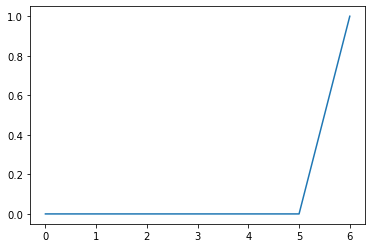

In [22]:
plt.figure()
plt.plot(range(n), normed_eigen_values)
plt.show()

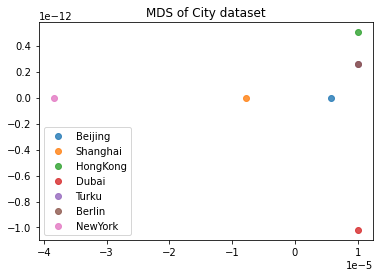

In [23]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for i in range(n):
    plt.scatter(X2[i, 0], X2[i, 1], alpha=.8, label=cities[i])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('MDS of City dataset')
plt.show()
